In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import preprocessing as ps
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="Set2")

In [4]:
df=pd.read_csv('../datasets/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<h3>Dataset Overview
</h3>

In [5]:
ps.dataset_analysis(df,target_column='Price')


Dataset Shape (Rows & Columns)
Rows :- 1303
Columns :- 12
Unique Rows: 1303 (100.00%)
Duplicate Rows: 0 (0.00%)

Columns with Null Values and Null Value Counts
No columns contain null values.

Data Type Wise Column Count
object     9
float64    2
int64      1
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : Company, TypeName, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight


Discrete Numeric Columns : -----


Continuous Columns : Unnamed: 0, Inches, Price


Unknown Columns : -----

Skewness of Numerical Columns
Unnamed: 0: 0.00 -> Approximately Symmetric. 
Inches: -0.45 -> Approximately Symmetric. 
Price: 1.52 -> Strong Positive Skew. Consider transformation (e.g., log or square root)

Constant Unique Values in Categorical Columns

Unique Values in Categorical Columns
Company: ['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba', 'Vero',

<h2>Data Preprocessing & EDA</h2>

In [6]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [7]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
np.set_printoptions(threshold=np.inf)

print(df['Memory'].values.tolist())

['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD', '256GB SSD', '500GB HDD', '256GB Flash Storage', '256GB Flash Storage', '512GB SSD', '256GB SSD', '500GB HDD', '500GB HDD', '256GB SSD', '256GB SSD', '256GB SSD', '256GB SSD', '256GB SSD', '512GB SSD', '1TB HDD', '128GB SSD', '32GB Flash Storage', '128GB SSD +  1TB HDD', '500GB HDD', '256GB SSD', '256GB SSD', '1TB HDD', '128GB Flash Storage', '256GB SSD', '256GB SSD +  256GB SSD', '1TB HDD', '64GB Flash Storage', '32GB Flash Storage', '500GB HDD', '512GB SSD', '256GB Flash Storage', '64GB Flash Storage', '1TB HDD', '128GB SSD +  1TB HDD', '1TB HDD', '256GB SSD', '1TB HDD', '256GB SSD +  1TB HDD', '1TB HDD', '256GB SSD', '1TB HDD', '256GB SSD', '128GB SSD', '256GB SSD +  1TB HDD', '256GB SSD', '1TB HDD', '64GB Flash Storage', '256GB SSD', '256GB SSD', '512GB SSD', '1TB HDD', '256GB SSD', '128GB SSD', '256GB SSD', '256GB SSD +  2TB HDD', '256GB SSD', '256GB SSD +  2TB HDD', '256GB SSD', '256GB SSD', '256GB SSD', '256GB SSD', 

In [9]:
memory=[]
for i in df['Memory'].values.tolist():
    if ('+' in i):
        pass
    else:
        splitString=i.split(' ')
        if len(splitString)>0:
            value=splitString[1].strip()
            if value not in memory:
                memory.append(value)



In [10]:
memory

['SSD', 'Flash', 'HDD', 'Hybrid']

In [11]:
import re
# Function to extract storage values in GB
def extract_storage(row):
    row = row.lower()
    storage_values = {'ssd': 0, 'hdd': 0, 'flash': 0,'hybrid':0}
    
    # Match patterns like 128gb ssd or 1tb hdd
    matches = re.findall(r'(\d+(?:\.\d+)?)(tb|gb)\s*(ssd|hdd|flash|hybrid)', row)
    
    for size, unit, stype in matches:
        size = float(size)
        # Convert TB to GB
        if unit == 'tb':
            size *= 1024
        storage_values[stype] += int(size)
    
    return pd.Series(storage_values)

# Apply row-wise
df[['ssd', 'hdd', 'flash','hybrid']] = df['Memory'].apply(extract_storage)


In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,128,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256,0,0,0


In [13]:
df[df['Memory'].str.contains('\+', na=False)].head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid
21,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,53226.72,128,1024,0,0
28,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8GB,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88kg,69157.44,512,0,0,0
37,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.8kg,52161.12,128,1024,0,0
41,Dell,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65kg,79866.72,256,1024,0,0
47,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,69210.72,256,1024,0,0


In [14]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,0,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,128,0


In [15]:
df['Resolution']=df['ScreenResolution'].map(lambda x:x.split(' ')[-1])
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,0,0,0,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,128,0,1440x900


In [16]:
df['Resolution'].value_counts()

Resolution
1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [17]:
def calculate_ppi(resolution: str, inches: float) -> float:
    """
    Calculate PPI from resolution (e.g. '1920x1080') and diagonal inches.
    """
    try:
        width, height = map(int, resolution.lower().split('x'))
        ppi = np.sqrt(width**2 + height**2) / inches
        return round(ppi, 2)
    except Exception as e:
        print(f"Error: {e}")
        return None

In [18]:
df['PPI'] = df.apply(lambda row: calculate_ppi(row['Resolution'], row['Inches']), axis=1)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,0,0,0,2560x1600,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,128,0,1440x900,127.68


In [19]:
df=df.drop(columns=['Memory','ScreenResolution'],axis=1)

In [20]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,0,0,0,2560x1600,226.98
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,128,0,1440x900,127.68
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256,0,0,0,1920x1080,141.21
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512,0,0,0,2880x1800,220.53
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256,0,0,0,2560x1600,226.98


In [21]:
df['Cpu']=df['Cpu'].map(lambda x: x.split(' ')[0])
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution,PPI
0,Apple,Ultrabook,13.3,Intel,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,128,0,0,0,2560x1600,226.98
1,Apple,Ultrabook,13.3,Intel,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,128,0,1440x900,127.68
2,HP,Notebook,15.6,Intel,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,256,0,0,0,1920x1080,141.21
3,Apple,Ultrabook,15.4,Intel,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,512,0,0,0,2880x1800,220.53
4,Apple,Ultrabook,13.3,Intel,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,256,0,0,0,2560x1600,226.98


In [22]:
df['Gpu']=df['Gpu'].map(lambda x: ' '.join(x.split(' ')[:-2]))

In [23]:
df.head(2)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution,PPI
0,Apple,Ultrabook,13.3,Intel,8GB,Intel Iris Plus,macOS,1.37kg,71378.6832,128,0,0,0,2560x1600,226.98
1,Apple,Ultrabook,13.3,Intel,8GB,Intel HD,macOS,1.34kg,47895.5232,0,0,128,0,1440x900,127.68


In [24]:
df['Gpu'].value_counts()

Gpu
Intel HD              609
Nvidia GeForce        222
Nvidia                148
AMD Radeon             93
AMD                    84
Intel UHD              68
Intel                  30
Nvidia GeForce GTX     29
Intel Iris Plus        10
Intel Iris              4
AMD FirePro             2
Nvidia GTX              1
                        1
Intel HD Graphics       1
ARM Mali                1
Name: count, dtype: int64

In [25]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution,PPI
0,Apple,Ultrabook,13.3,Intel,8GB,Intel Iris Plus,macOS,1.37kg,71378.6832,128,0,0,0,2560x1600,226.98
1,Apple,Ultrabook,13.3,Intel,8GB,Intel HD,macOS,1.34kg,47895.5232,0,0,128,0,1440x900,127.68
2,HP,Notebook,15.6,Intel,8GB,Intel HD,No OS,1.86kg,30636.0000,256,0,0,0,1920x1080,141.21
3,Apple,Ultrabook,15.4,Intel,16GB,AMD Radeon,macOS,1.83kg,135195.3360,512,0,0,0,2880x1800,220.53
4,Apple,Ultrabook,13.3,Intel,8GB,Intel Iris Plus,macOS,1.37kg,96095.8080,256,0,0,0,2560x1600,226.98


In [26]:
import re
df['Weight']=df['Weight'].map(lambda x: float(re.findall(r'\d+\.?\d*', x)[0]))
df['Ram']=df['Ram'].map(lambda x: float(re.findall(r'\d+\.?\d*', x)[0]))

In [27]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,ssd,hdd,flash,hybrid,Resolution,PPI
0,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,71378.6832,128,0,0,0,2560x1600,226.98
1,Apple,Ultrabook,13.3,Intel,8.0,Intel HD,macOS,1.34,47895.5232,0,0,128,0,1440x900,127.68
2,HP,Notebook,15.6,Intel,8.0,Intel HD,No OS,1.86,30636.0000,256,0,0,0,1920x1080,141.21
3,Apple,Ultrabook,15.4,Intel,16.0,AMD Radeon,macOS,1.83,135195.3360,512,0,0,0,2880x1800,220.53
4,Apple,Ultrabook,13.3,Intel,8.0,Intel Iris Plus,macOS,1.37,96095.8080,256,0,0,0,2560x1600,226.98


In [28]:
df.select_dtypes('object').columns

Index(['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys', 'Resolution'], dtype='object')

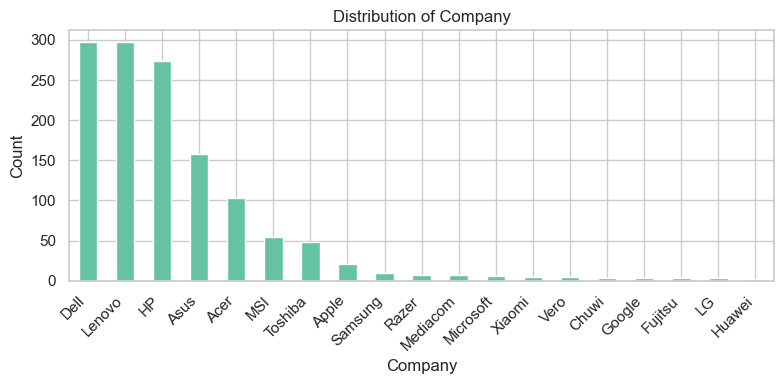

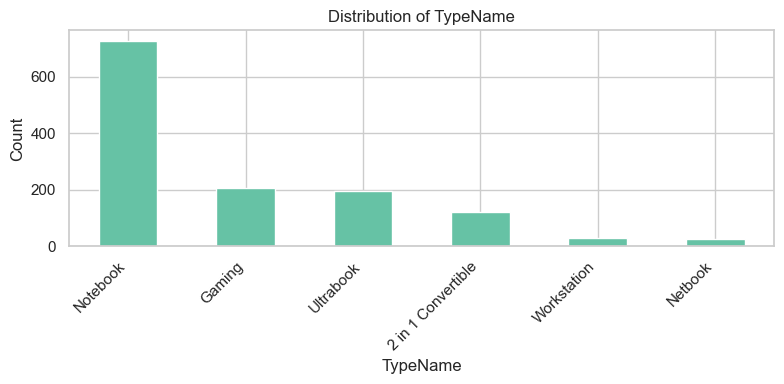

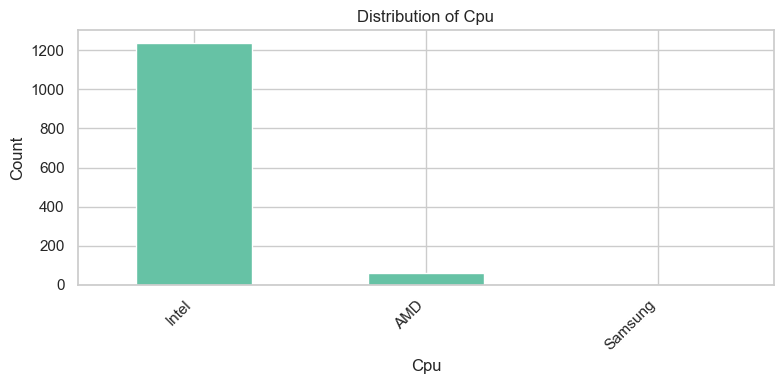

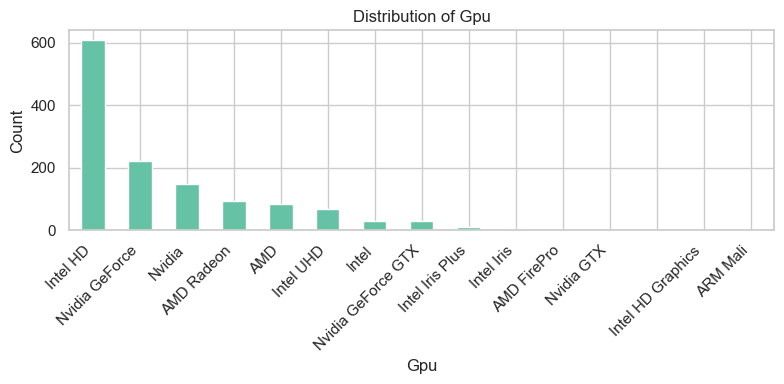

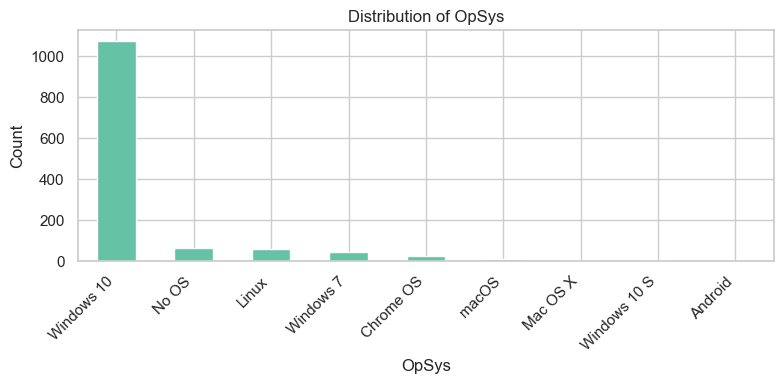

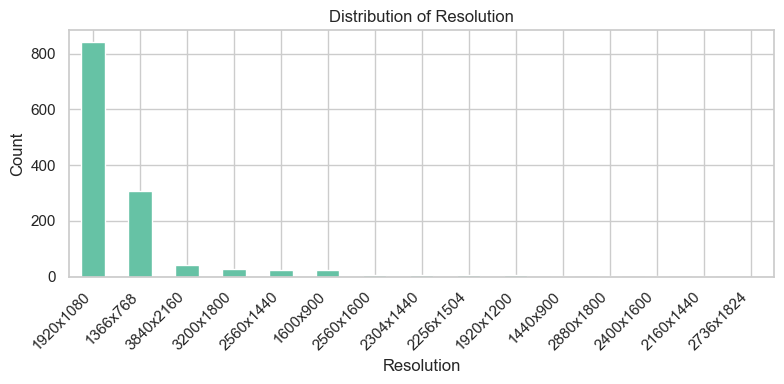

In [29]:
for col in df.select_dtypes('object').columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

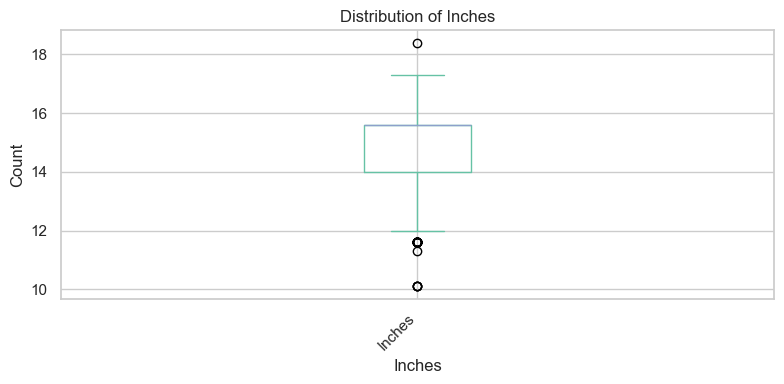

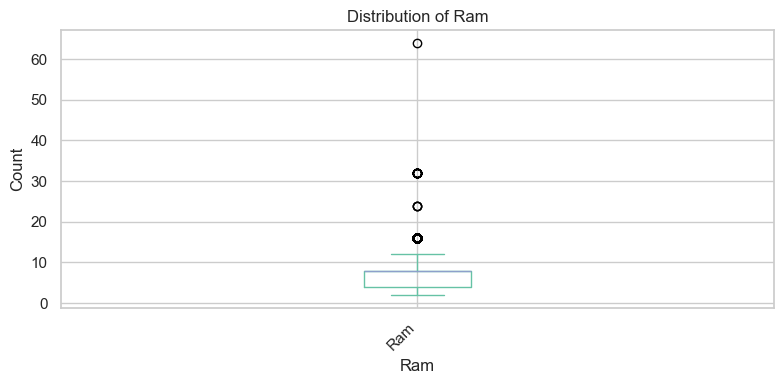

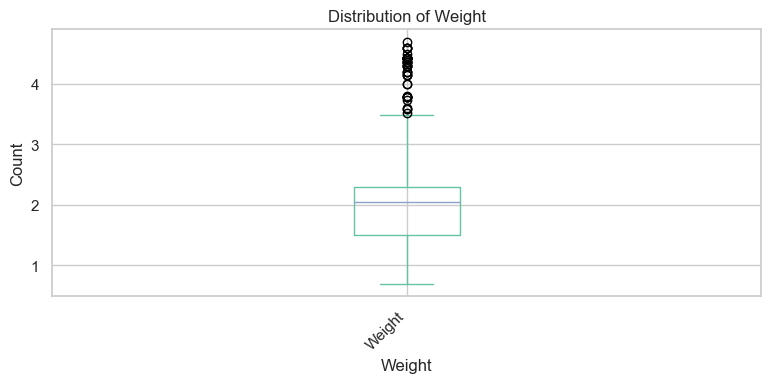

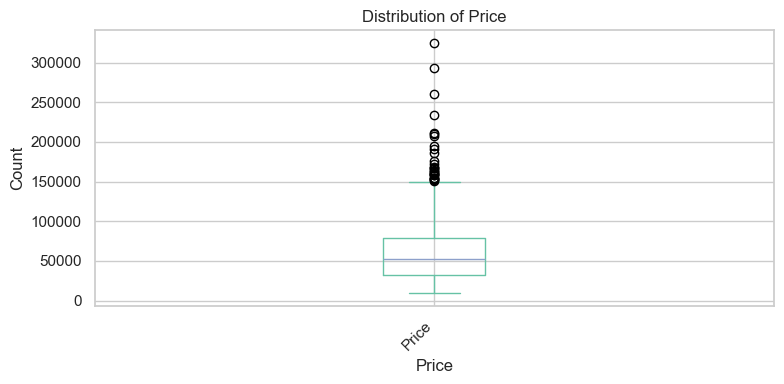

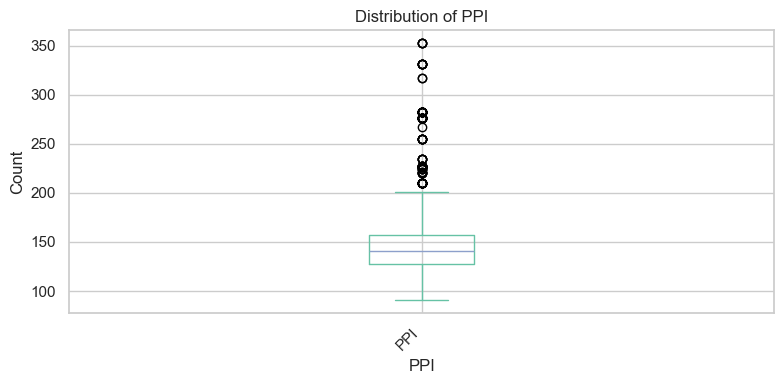

In [30]:
for col in df.select_dtypes('float').columns:
    plt.figure(figsize=(8, 4))
    df[col].plot(kind='box')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [31]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Price', 'ssd', 'hdd', 'flash', 'hybrid', 'Resolution', 'PPI'],
      dtype='object')

<Axes: xlabel='PPI', ylabel='Price'>

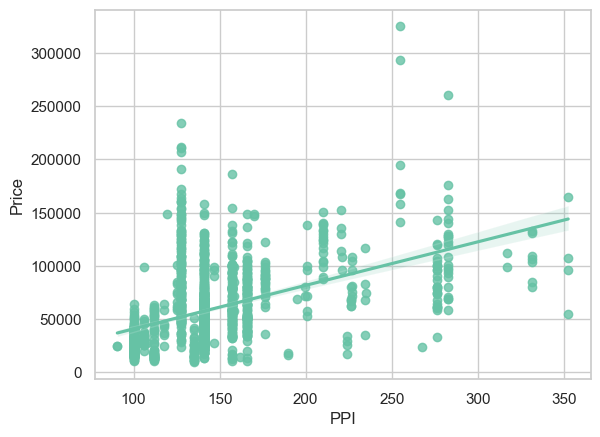

In [32]:
sns.regplot(data=df,x='PPI',y='Price')

<Axes: xlabel='Ram', ylabel='Price'>

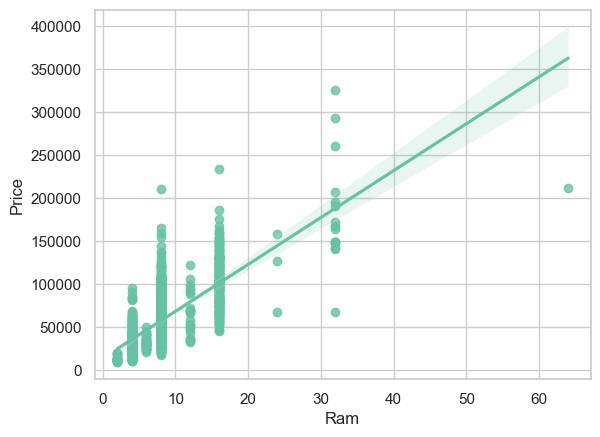

In [33]:
sns.regplot(data=df,x='Ram',y='Price')

In [34]:
#take less 40gb ram
df=df[df['Ram']<40]

In [35]:
#take less than price 200000
df=df[df['Price']<=200000]

In [36]:
#take less than 300 ppi values
df=df[df['PPI']<300]

<Axes: xlabel='PPI', ylabel='Price'>

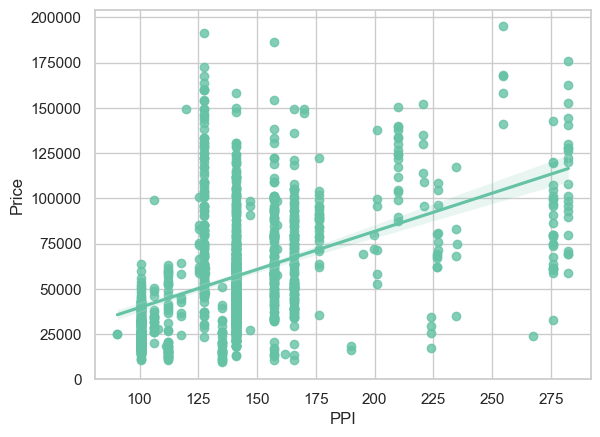

In [37]:
sns.regplot(data=df,x='PPI',y='Price')

<Axes: xlabel='Ram', ylabel='Price'>

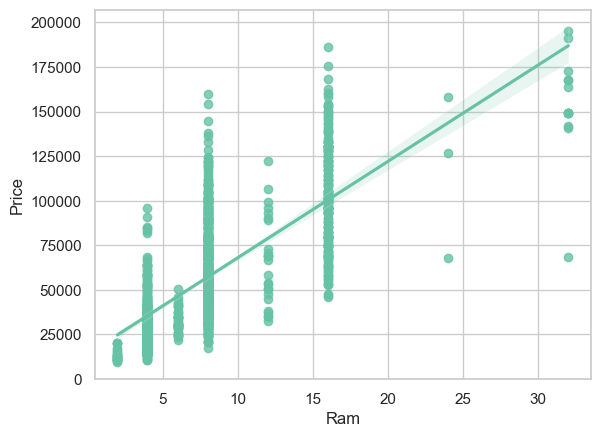

In [38]:
sns.regplot(data=df,x='Ram',y='Price')

<Axes: ylabel='Density'>

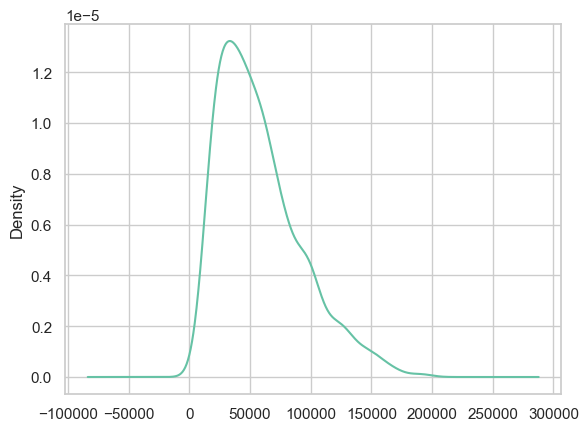

In [39]:
df['Price'].plot(kind='kde')

<Axes: ylabel='Density'>

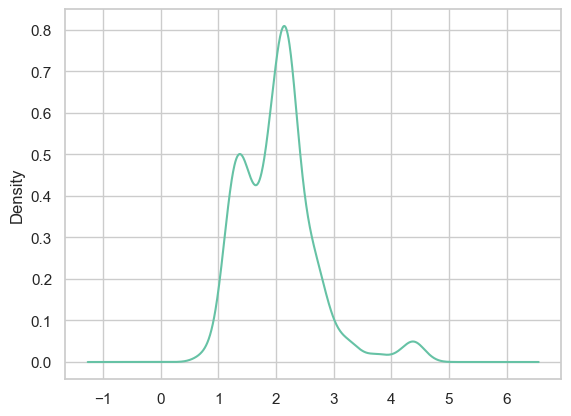

In [41]:
df['Weight'].plot(kind='kde')

In [40]:
df.columns


Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Price', 'ssd', 'hdd', 'flash', 'hybrid', 'Resolution', 'PPI'],
      dtype='object')

In [42]:
df.to_csv('../datasets/clean_dataset.csv')